# Business Case: Prediction of car price using Machine learning Algorithms

# Data Analysis Report
The problem tasks is about determining how price of car model which depends on its various features.We have to how exactly the prices vary with the independent
variables that can help them accordingly manipulate the design of the cars, the business strategy etc

Data Set has three types of data in columns and one target variable:

Columns that has features of vehicle : like make, fuel-type, height , weight, width, curb-weight , engine-type , cylinders , engine size, horsepower,
peak-rpm, engine size , fuel system, bore, stroke, compression-ratio,horsepower, peak-rpm,city-mpg,highway-mpg

"Symboling" or the risk factor : Symboling depicts level of risk. Value of symboling lies between -3 to 3 in the data set.

Normalized-losses : Normalized losses is a variable that represents the relative average loss payment per insured vehicle . This value is normalized for all 
autos within a particular size classification . It represents the average loss per car per year and sits mostly between the range 65 and 256. Normalized losses 
are used as compared to other cars. The second rating corresponds to the degree to which the auto is more risky than its price indicates. Cars are initially assigned a risk factor symbol associated with its price. Then, if it is more risky (or less), this symbol is adjusted by moving it up (or down) the scale. Actuarians call this process “symboling”. A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe.
The Target Variable "price" is continuous in nature.

By checking Summary analysis we found:
#The mean price(target variable) is around 13K while min is 5k max is 45k. There is lot of gap between mean and max value as compared to mean 
and min value which gives an indication that data might be skewed at one side after mean
#The level of risk is from -2 to3 range here.
#We also found we have features with dtypes as: float64(5), int64(6), object(15)

There are no NULL values in the data. But, when we see the unique values of each column we will see there are 6 columns/features which have '?' as one of the data.
These all were converted to NAN and replaced with median values. We also saw that there were many object columns which had to be converted to int and float as their
value  should be numerical('normalized-losses','num-of-doors','bore','stroke','horsepower','peak-rpm').
Outliers  analysis using box plot analysis was done and handled.
Dimension reduction was critical for our data set. Due to the EDA, we observe that a lot of variables are highly correlated, so including all of them into 
the analysis might introduce more noises. In this section, we mainly use manual and one hot encoding( for low cardinality ) to do dimensionality reduction.

At last we did modelling with different models and found which is the best model and what all features affect the price most and should be taken into consideration to adjust pricing.


# Creating a predictive model by applying some data science techniques 

In [599]:
# Loading libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


In [600]:
# Importing the data
df=pd.read_csv(r'C:\Users\CHANDU\Downloads\Data\auto_imports.csv')
pd.set_option('display.max_columns', None)
df.head()

,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.60,168.80,64.10,48.80,2548,dohc,four,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


### Renaming the columns

In [601]:
df=df.rename(columns={'3':'symboling','?':'normalized_losses','alfa-romero':'make','gas':'fuel_type','std':'aspiration','two':'num_of_doors',
                  'convertible':'body_style','rwd':'drive_wheels','front':'engine_location','88.60':'wheel_base','168.80':'length','64.10':'width',
                  '48.80':'height','2548':'curb_weight','dohc':'engine_type','four':'num_of_cylinders','130':'engine_size','mpfi':'fuel_system',
                  '3.47':'bore','2.68':'stroke','9.00':'compression_ratio','111':'horsepower','5000':'peak_rpm','21':'city_mpg','27':'highway_mpg',
                  '13495':'price'})
df.head() # To check top 5 rows

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,num_of_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


In [602]:
# Replacing the missing values with NULL.
df=df.replace({'?':np.nan})
df.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,num_of_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,NaN,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


# Domain Analysis

## Symboling
* Cars are initially assigned a risk factor symbol associated with its price. Then, if it is more risky (or less), this symbol is adjusted by moving it up (or down) the scale and has a range of (-3 to+3).
## normalized losses
* is the relative average loss payment per insured vehicle year 
* Make refers to the car's manufacturer
## fuel type
* Type of fuel used in automobiles ( diesel, gas.)
## Aspiration:
* It defines how intake of air happens into the internal conmbustion engine.
* Naturally Aspirated those that take in air under normal means at normal atmospheric pressures.
* Turbo Aspirated Uses a turbocharger to compress air for forced induction.
## Number of Doors
* Number of doors of the Automobiles (two or four).
## Body Style
* Is thecategorisation of a vehicle based on its design, shape and space
## Drive wheels
* The wheels that move a car and are typically connected to the engine.
## Engine location
* Refers to the engine loaction(front or rear).
## wheel base
* Distance between the centres of the front and rear wheels 
## length
* Refers to length to automobile 
## width
* Refers to length to automobile 
## Height
* Height of automobile
## curb weight
*  weight of the vehicle, including a full tank of fuel and all standard equipment
## Engine type
* Type of engine 
## number-of-cylinders
* Number of cylinders in the engine.
## Engine-size
* specifies the size of engine 
## fuel-system
* The fuel system in a vehicle is the combination of parts needed to carry fuel into and out of the engine
## Bore
* the bore (or cylinder bore) is the diameter of each cylinder.
## stroke:
* distance traveled by the piston within the engine cylinder
## compression ratio
* refers to the ratio of the maximum volume of the combustion chamber (when the piston is at the bottom dead center) to the minimum volume (when the piston is at the top dead center) 
## Horsepower
* Horsepower (HP) is a unit of measurement used to quantify the power or work output of engines
## Peak Rpm
* Peak RPM (Revolutions Per Minute) in automobiles refers to the engine speed at which it generates its maximum horsepower or torque 
## City MPG
* 
"City MPG" in automobiles refers to the estimated fuel efficiency measured in miles per gallon (MPG) under city driving condition.
## Highway MPG
* "Highway MPG" in automobiles refers to the estimated fuel efficiency measured in miles per gallon (MPG) under highway or freeway driving conditions.
## Price
* 
"Price" in the context of automobiles refers to the cost associated with purchasing a vehicle.

# Basic checks

In [478]:
df.shape # checking the shape of data 

(200, 26)

In [604]:
df.columns # checking the columns in the data

Index(['symboling', 'normalized_losses', 'make', 'fuel_type', 'aspiration',
       'num_of_doors', 'body_style', 'drive_wheels', 'engine_location',
       'wheel_base', 'length', 'width', 'height', 'curb_weight', 'engine_type',
       'num_of_cylinders', 'engine_size', 'fuel_system', 'bore', 'stroke',
       'compression_ratio', 'horsepower', 'peak_rpm', 'city_mpg',
       'highway_mpg', 'price'],
      dtype='object')

In [481]:
df.info() # It gives information about the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          200 non-null    int64  
 1   normalized_losses  164 non-null    object 
 2   make               200 non-null    object 
 3   fuel_type          200 non-null    object 
 4   aspiration         200 non-null    object 
 5   num_of_doors       198 non-null    object 
 6   body_style         200 non-null    object 
 7   drive_wheels       200 non-null    object 
 8   engine_location    200 non-null    object 
 9   wheel_base         200 non-null    float64
 10  length             200 non-null    float64
 11  width              200 non-null    float64
 12  height             200 non-null    float64
 13  curb_weight        200 non-null    int64  
 14  engine_type        200 non-null    object 
 15  num_of_cylinders   200 non-null    object 
 16  engine_size        200 non

### After performing Basic checks we can see that even when data inside the columns ['normalized_losses','bore','stroke','horsepower','peak_rpm'] is integer type the data frame is storing it has object type. so we need convert into integer format.

In [605]:
# coverting object type into integer data type
df[['normalized_losses','bore','stroke','horsepower','peak_rpm']]=df[['normalized_losses','bore','stroke','horsepower','peak_rpm']].apply(pd.to_numeric,errors='coerce')

# As you can see we have successfully converted these columns into integer format

In [606]:
df.describe() # Gives Statsistical analaysis on Numerical data

,symboling,normalized_losses,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
count,200.000000,164.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,196.000000,196.000000,200.000000,198.000000,198.000000,200.000000,200.000000,200.000000
mean,0.830000,122.000000,98.848000,174.228000,65.898000,53.791500,2555.705000,126.860000,3.330000,3.259847,10.170100,103.358586,5118.181818,25.200000,30.705000,13205.690000
std,1.248557,35.442168,6.038261,12.347132,2.102904,2.428449,518.594552,41.650501,0.271303,0.317383,4.014163,37.645120,481.666657,6.432487,6.827227,7966.982558
min,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.000000,94.500000,166.675000,64.175000,52.000000,2163.000000,97.750000,3.150000,3.110000,8.575000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,115.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,119.500000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10270.000000
75%,2.000000,150.000000,102.400000,183.500000,66.675000,55.525000,2928.250000,142.000000,3.590000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.750000
max,3.000000,256.000000,120.900000,208.100000,72.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000


In [607]:
df.describe(include='O') # Gives statastical analysis on categorical data

,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,engine_type,num_of_cylinders,fuel_system
count,200,200,200,198,200,200,200,200,200,200
unique,22,2,2,2,5,3,2,6,7,8
top,toyota,gas,std,four,sedan,fwd,front,ohc,four,mpfi
freq,32,180,164,113,94,118,197,145,156,91


# EDA (Exploratory Data Analysis)

In [487]:
# importing seaborn
import seaborn as sns

In [608]:
# storing all numerical data into num_data variable
num_data=df.select_dtypes(include=['int64','float64'])
# storing all categorical data to cat_data variable
cat_data=df.select_dtypes(include='O')

In [609]:
num_data.shape # checking for shape

(200, 16)

# Univariate Analysis

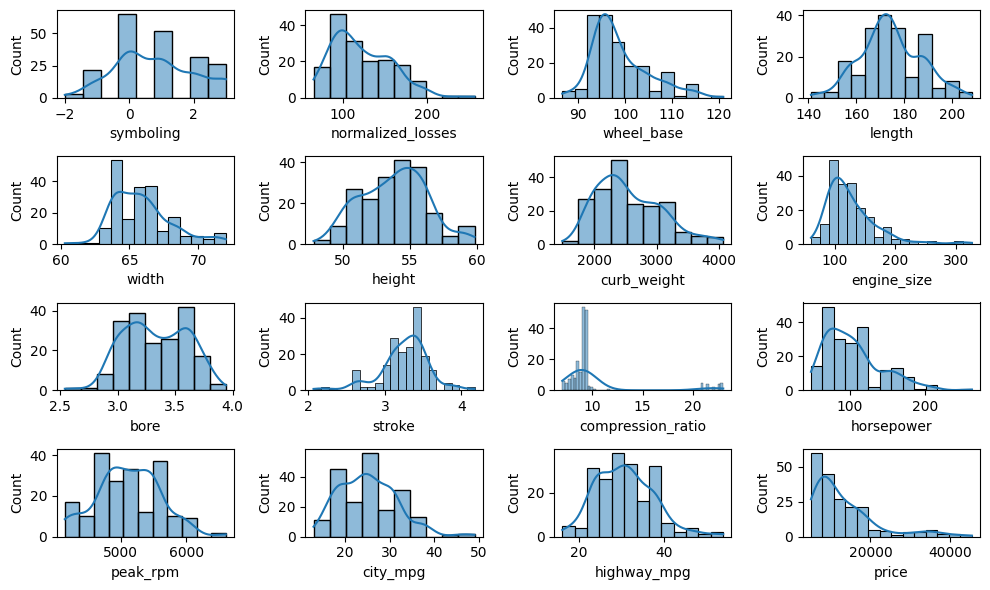

In [610]:
# using a for loop to plot histogram for numercial data.
plt.figure(figsize=(10,6))
plot_num=1
for column in num_data:
    if plot_num<=16:
        ax=plt.subplot(4,4,plot_num)
        sns.histplot(data=num_data[column],kde=True)
    plot_num+=1
plt.tight_layout()

# Insights
* Symboling or the insurance risk rating have the ratings between -3 and 3 however for our dataset it starts from -2. There are more cars in the range of 0 and 1.
* Normalized losses which is the average loss payment per insured vehicle year is has more number of cars in the range between 65 and 150.
* Curb weight of the cars are distributed between 1500 and 4000 approximately
* Most vehicle has horsepower 50 to 125
* Most Vehicle are in price range 5000 to 18000
* peak rpm is mostly distributed between 4600 to 5700
* The Engine Size is inrange 60 to 190

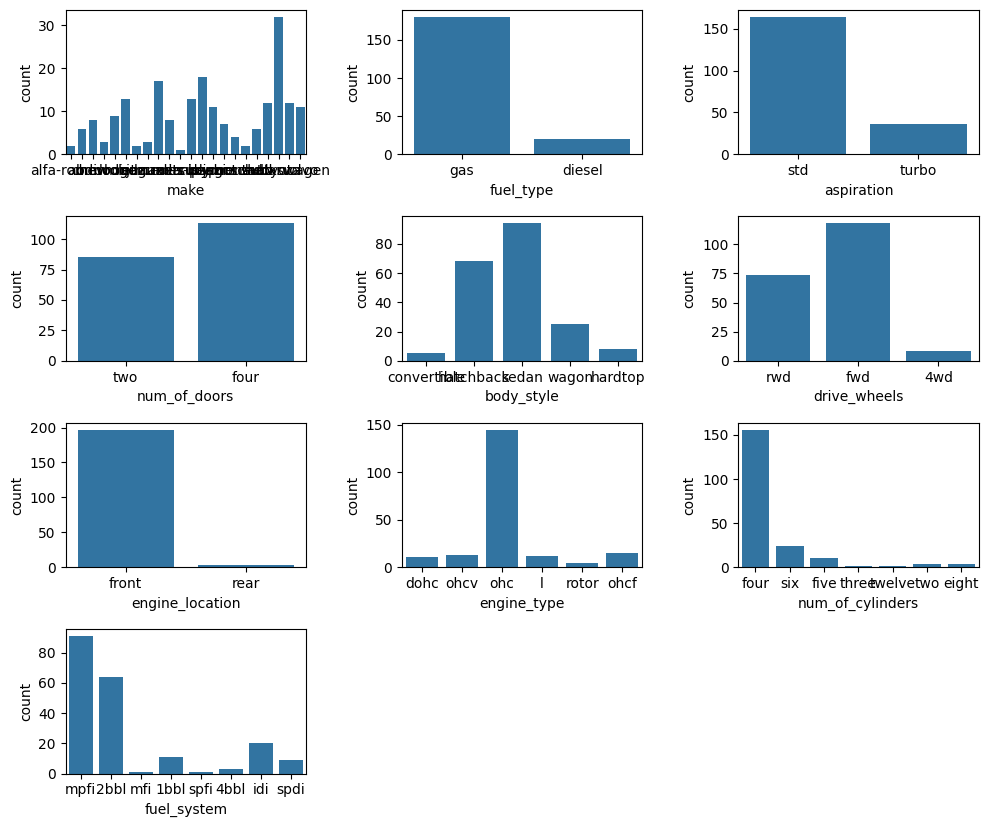

In [611]:
# using for loop to plot count plots for categorical variables
plt.figure(figsize=(10,10))
plot_num=1
for column in cat_data:
    if plot_num<=16:
        ax=plt.subplot(5,3,plot_num)
        sns.countplot(data=cat_data,x=column)
        plt.xlabel(column)
        plt.ylabel('count')
    plot_num+=1
plt.tight_layout()

# Insights
* Toyota is the make of the car which has most number of vehicles
* For drive wheels, front wheel drive has most number of cars followed by rear wheel and four wheel. There are very less number of cars for four wheel drive.
* Most preferred fuel type for the customer is gas and there are very less vechiles using diseal fuel.
* 57% of the cars has 4 doors
* 82% of the cars have std aspiration.
* More than 70 % of the vehicle has Ohc type of Engine
* Most produced vehicle are of body style sedan around 48% followed by hatchback 32%
* most vechiles have engine type as ohc.


# Bi variate analysis

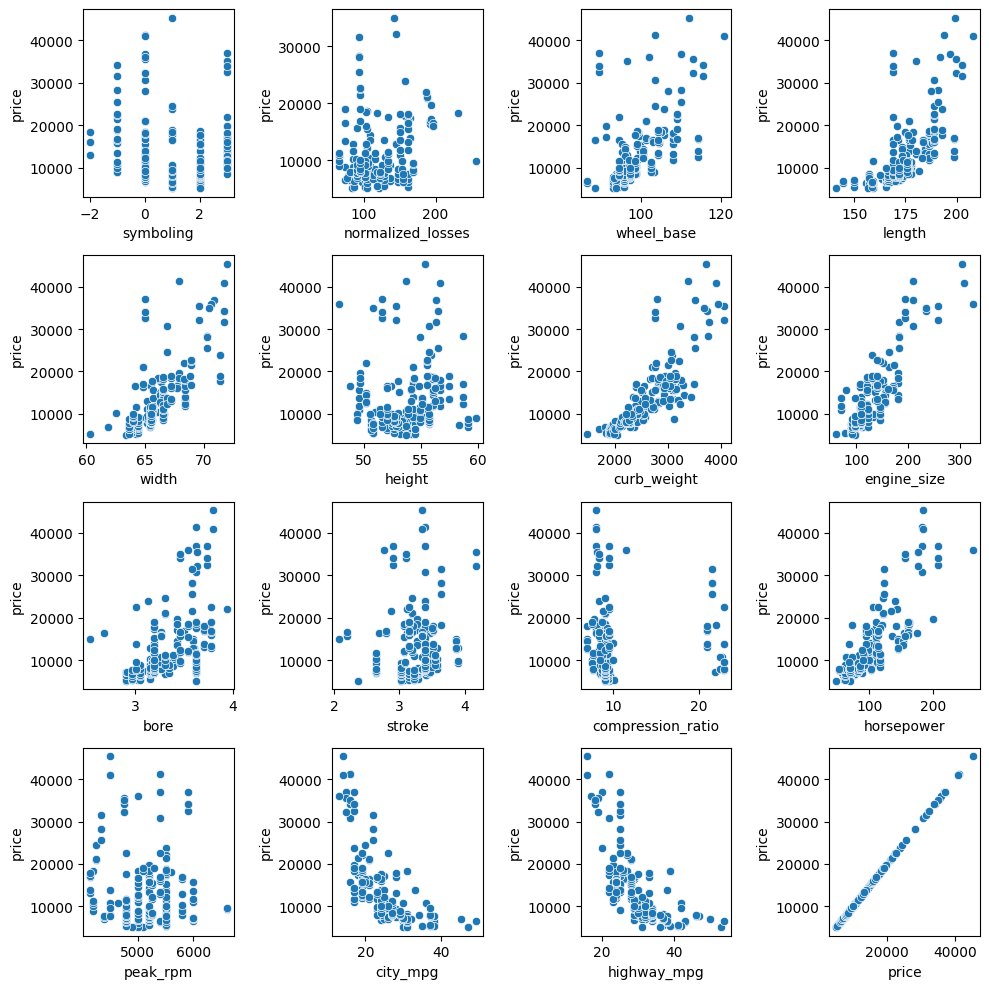

In [612]:
# plotting scatter plots
plt.figure(figsize=(10,10))
plot_num=1
for column in num_data:
    if plot_num<=16:
        ax=plt.subplot(4,4,plot_num)
        sns.scatterplot(data=num_data,x=column,y=df.price)
    plot_num+=1
plt.tight_layout()

# Insights
* Increase in length,curb weight,engine size,horse power causes the price of the vechile to increase.
* city mpg and highway mpg has negative correlation with price.

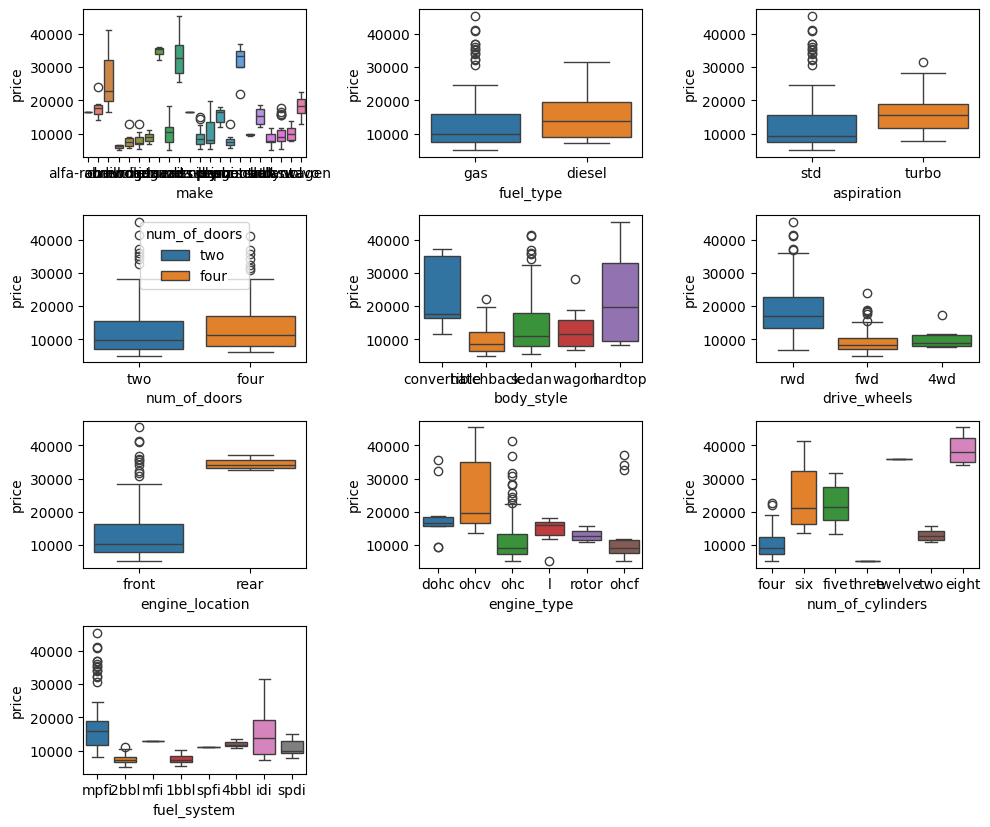

In [613]:
# plotting scatter plots
plt.figure(figsize=(10,10))
plot_num=1
for column in cat_data:
    if plot_num<=16:
        ax=plt.subplot(5,3,plot_num)
        sns.boxplot(data=cat_data,x=column,y=df.price,hue=column)
    plot_num+=1
plt.tight_layout()

# Insights
* Turbo models have higher prices than for the standard model
* mercedes benz model are expensive in prices.
* rwd wheel drive vehicle have expensive prices
* 8 cylinder vechiles are available only at expensive prices
* Diseal fuel type are expensive when compared to gas model.

# Data preprocessing

In [614]:
df.isnull().sum() # checking for null values

symboling             0
normalized_losses    36
make                  0
fuel_type             0
aspiration            0
num_of_doors          2
body_style            0
drive_wheels          0
engine_location       0
wheel_base            0
length                0
width                 0
height                0
curb_weight           0
engine_type           0
num_of_cylinders      0
engine_size           0
fuel_system           0
bore                  4
stroke                4
compression_ratio     0
horsepower            2
peak_rpm              2
city_mpg              0
highway_mpg           0
price                 0
dtype: int64

### we can find there are missing values in normalized losses,bore,stroke,horse power and peak rpm. we need to handle them

# Handling Missing values

In [615]:
# Handling Missing values in Numercial columns
num_missing_col=['normalized_losses','bore','stroke','horsepower','peak_rpm']
for col in num_missing_col:
    df[col]=df[col].fillna(df[col].median())

In [616]:
#handling missing values for Number of doors
mode=df.num_of_doors.mode()[0]
df['num_of_doors'].fillna(mode,inplace=True)

In [617]:
df.isnull().sum()

symboling            0
normalized_losses    0
make                 0
fuel_type            0
aspiration           0
num_of_doors         0
body_style           0
drive_wheels         0
engine_location      0
wheel_base           0
length               0
width                0
height               0
curb_weight          0
engine_type          0
num_of_cylinders     0
engine_size          0
fuel_system          0
bore                 0
stroke               0
compression_ratio    0
horsepower           0
peak_rpm             0
city_mpg             0
highway_mpg          0
price                0
dtype: int64

### We have handled the missing values by imputing with median for numerical data and with mode for categorical data.No more NUll Values are seen now.

## Checking for Duplicates

In [618]:
df.duplicated().sum()

0

# Check for Outliers

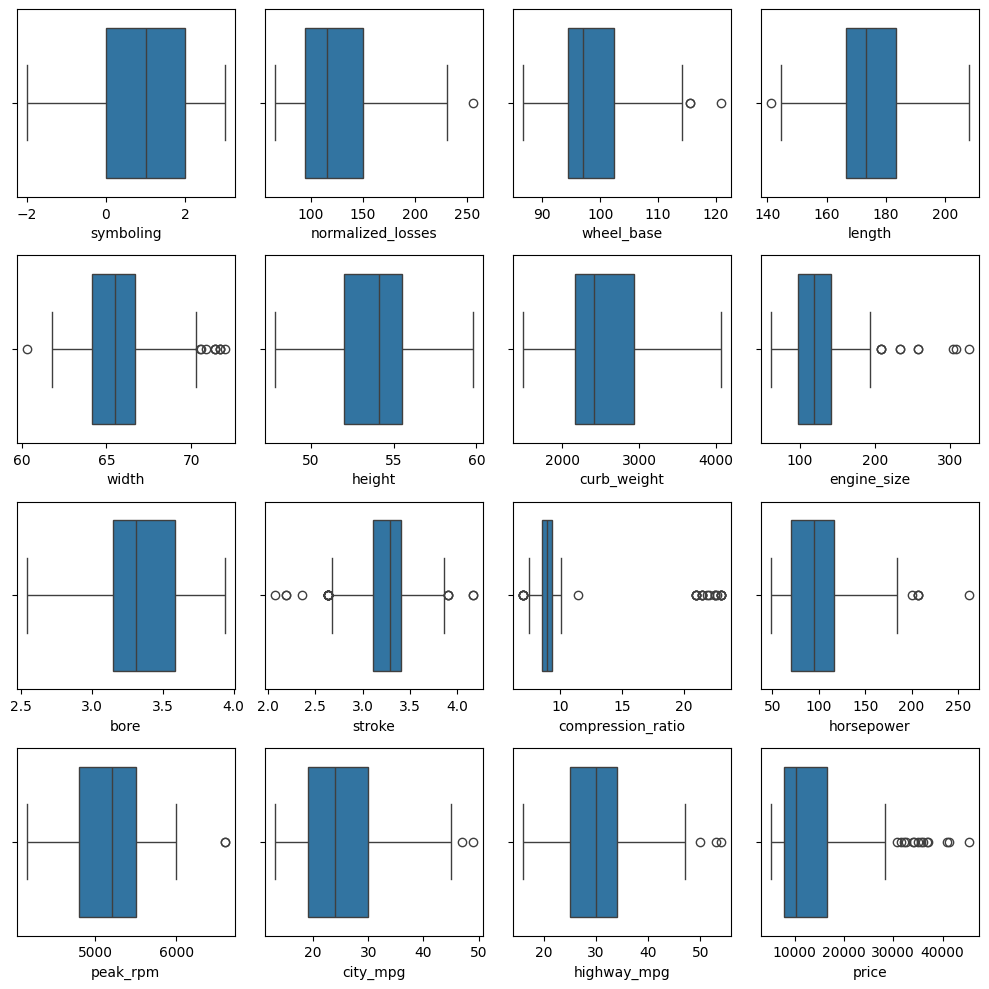

In [619]:
# Using boxplot to find the Outliers
plt.figure(figsize=(10,10))
plot_num=1
for column in num_data:
    if plot_num<=16:
        ax=plt.subplot(4,4,plot_num)
        sns.boxplot(data=num_data,x=column)
    plot_num+=1
plt.tight_layout()

### We can find Outliers in our data and we are going impute those outliers with median as data is skewed

# Handling Outliers

In [620]:
# storing columns with outliers in outliers_columns variable
outliers_columns=["normalized_losses","wheel_base",'length',"width","engine_size","stroke","compression_ratio",
                  "horsepower","peak_rpm","city_mpg","highway_mpg"]

In [621]:
# Function to handle Outliers
def replace_outliers_with_median(df,replace_threshold=5):
    for col in outliers_columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
        outlier_percentage = len(outliers) / len(df) * 100
        print(f"Column '{col}' has {outlier_percentage:.2f}% outliers.")
        
        if outlier_percentage <= replace_threshold: 
            # Replace outliers with median value
            median_value = df[col].median()
            df[col] = df[col].mask((df[col] < lower_bound) | (df[col] > upper_bound), median_value)
    
    return df

In [622]:
replace_outliers_with_median(df) # printing the percentage of Outliers in each column

Column 'normalized_losses' has 2.00% outliers.
Column 'wheel_base' has 1.50% outliers.
Column 'length' has 0.50% outliers.
Column 'width' has 5.50% outliers.
Column 'engine_size' has 5.00% outliers.
Column 'stroke' has 12.00% outliers.
Column 'compression_ratio' has 13.50% outliers.
Column 'horsepower' has 2.50% outliers.
Column 'peak_rpm' has 1.00% outliers.
Column 'city_mpg' has 1.00% outliers.
Column 'highway_mpg' has 1.50% outliers.


,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,num_of_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,115.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130.0,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500
1,1,115.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152.0,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500
2,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109.0,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950
3,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136.0,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450
4,2,115.0,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136.0,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,15250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141.0,mpfi,3.78,3.15,9.5,114.0,5400.0,23,28,16845
196,-1,95.0,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141.0,mpfi,3.78,3.15,8.7,160.0,5300.0,19,25,19045
197,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173.0,mpfi,3.58,2.87,8.8,134.0,5500.0,18,23,21485
198,-1,95.0,volvo,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145.0,idi,3.01,3.40,23.0,106.0,4800.0,26,27,22470


# Appling Scaling

In [623]:
columns=num_data.drop('price',axis=1).columns  # scaling all the numerical values excpet price(target variable)
columns

Index(['symboling', 'normalized_losses', 'wheel_base', 'length', 'width',
       'height', 'curb_weight', 'engine_size', 'bore', 'stroke',
       'compression_ratio', 'horsepower', 'peak_rpm', 'city_mpg',
       'highway_mpg'],
      dtype='object')

In [624]:
# scaling the data using standered scaler
# import standerd scaler
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
df[columns]=sc.fit_transform(df[columns])

In [625]:
# Creating a new dataframe to store the copy
df1=df.copy()

In [626]:
df1.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,num_of_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,1.742368,-0.127188,alfa-romero,gas,std,two,convertible,rwd,front,-1.785771,-0.462220,-0.857154,-2.060585,-0.014895,dohc,four,0.355803,mpfi,0.524067,-1.851995,-0.292224,0.331438,-0.231048,-0.660749,-0.538164,16500
1,0.136499,-0.127188,alfa-romero,gas,std,two,hatchback,rwd,front,-0.726073,-0.263718,-0.189737,-0.574437,0.516715,ohcv,six,1.145680,mpfi,-2.424744,0.668594,-0.292224,1.655343,-0.231048,-0.994461,-0.697856,16500
2,0.939433,1.587313,audi,gas,std,four,sedan,fwd,front,0.225859,0.182911,0.143971,0.209918,-0.422785,ohc,four,-0.398170,mpfi,-0.521081,0.445251,-0.042481,0.054342,0.869182,-0.160182,-0.059086,13950
3,0.939433,1.587313,audi,gas,std,four,sedan,4wd,front,0.154015,0.182911,0.239316,0.209918,0.518648,ohc,five,0.571224,mpfi,-0.521081,0.445251,-0.541967,0.454592,0.869182,-1.161317,-1.336626,17450
4,0.939433,-0.127188,audi,gas,std,two,sedan,fwd,front,0.225859,0.240808,0.191644,-0.285464,-0.094153,ohc,five,0.571224,mpfi,-0.521081,0.445251,-0.417096,0.300649,0.869182,-0.994461,-0.857549,15250


## Converting categorical data into Numerical data

In [627]:
# using for loop to print unique values and count of categorical data
for column in cat_data:
    print(column,df1[column].unique())
    print(df1[column].value_counts())
    print('---------------------------')

make ['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'mercedes-benz' 'mercury' 'mitsubishi' 'nissan' 'peugot'
 'plymouth' 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen'
 'volvo']
make
toyota           32
nissan           18
mazda            17
mitsubishi       13
honda            13
volkswagen       12
subaru           12
peugot           11
volvo            11
dodge             9
mercedes-benz     8
bmw               8
plymouth          7
audi              6
saab              6
porsche           4
jaguar            3
chevrolet         3
isuzu             2
renault           2
alfa-romero       2
mercury           1
Name: count, dtype: int64
---------------------------
fuel_type ['gas' 'diesel']
fuel_type
gas       180
diesel     20
Name: count, dtype: int64
---------------------------
aspiration ['std' 'turbo']
aspiration
std      164
turbo     36
Name: count, dtype: int64
---------------------------
num_of_doors ['two' 'four']
num_of_doors

In [628]:
# Finding the unique values in make columns having count less than 10
value_counts=df1.make.value_counts()
unique_values=value_counts[value_counts<10].index.tolist()

In [629]:
# Replacing the those unique values with others
df1['make']=df1.make.apply(lambda x: 'others' if x in unique_values else x)
df1.make.value_counts()

make
others        61
toyota        32
nissan        18
mazda         17
honda         13
mitsubishi    13
subaru        12
volkswagen    12
peugot        11
volvo         11
Name: count, dtype: int64

In [630]:
# One hot encoding the remaining categorical data
df2=pd.get_dummies(cat_data,drop_first=True,dtype=int)

In [631]:
# mering two dataframes into df3
df3=pd.concat([df1,df2],axis=1)

In [632]:
# Dropping the categorical columns as we have Encoded them into dummies.
df3.drop(columns=cat_data.columns,axis=1,inplace=True)

In [634]:
df3.dtypes # NO more Object datatypes present

symboling            float64
normalized_losses    float64
wheel_base           float64
length               float64
width                float64
                      ...   
fuel_system_idi        int32
fuel_system_mfi        int32
fuel_system_mpfi       int32
fuel_system_spdi       int32
fuel_system_spfi       int32
Length: 65, dtype: object

# Feature Selection

<Axes: >

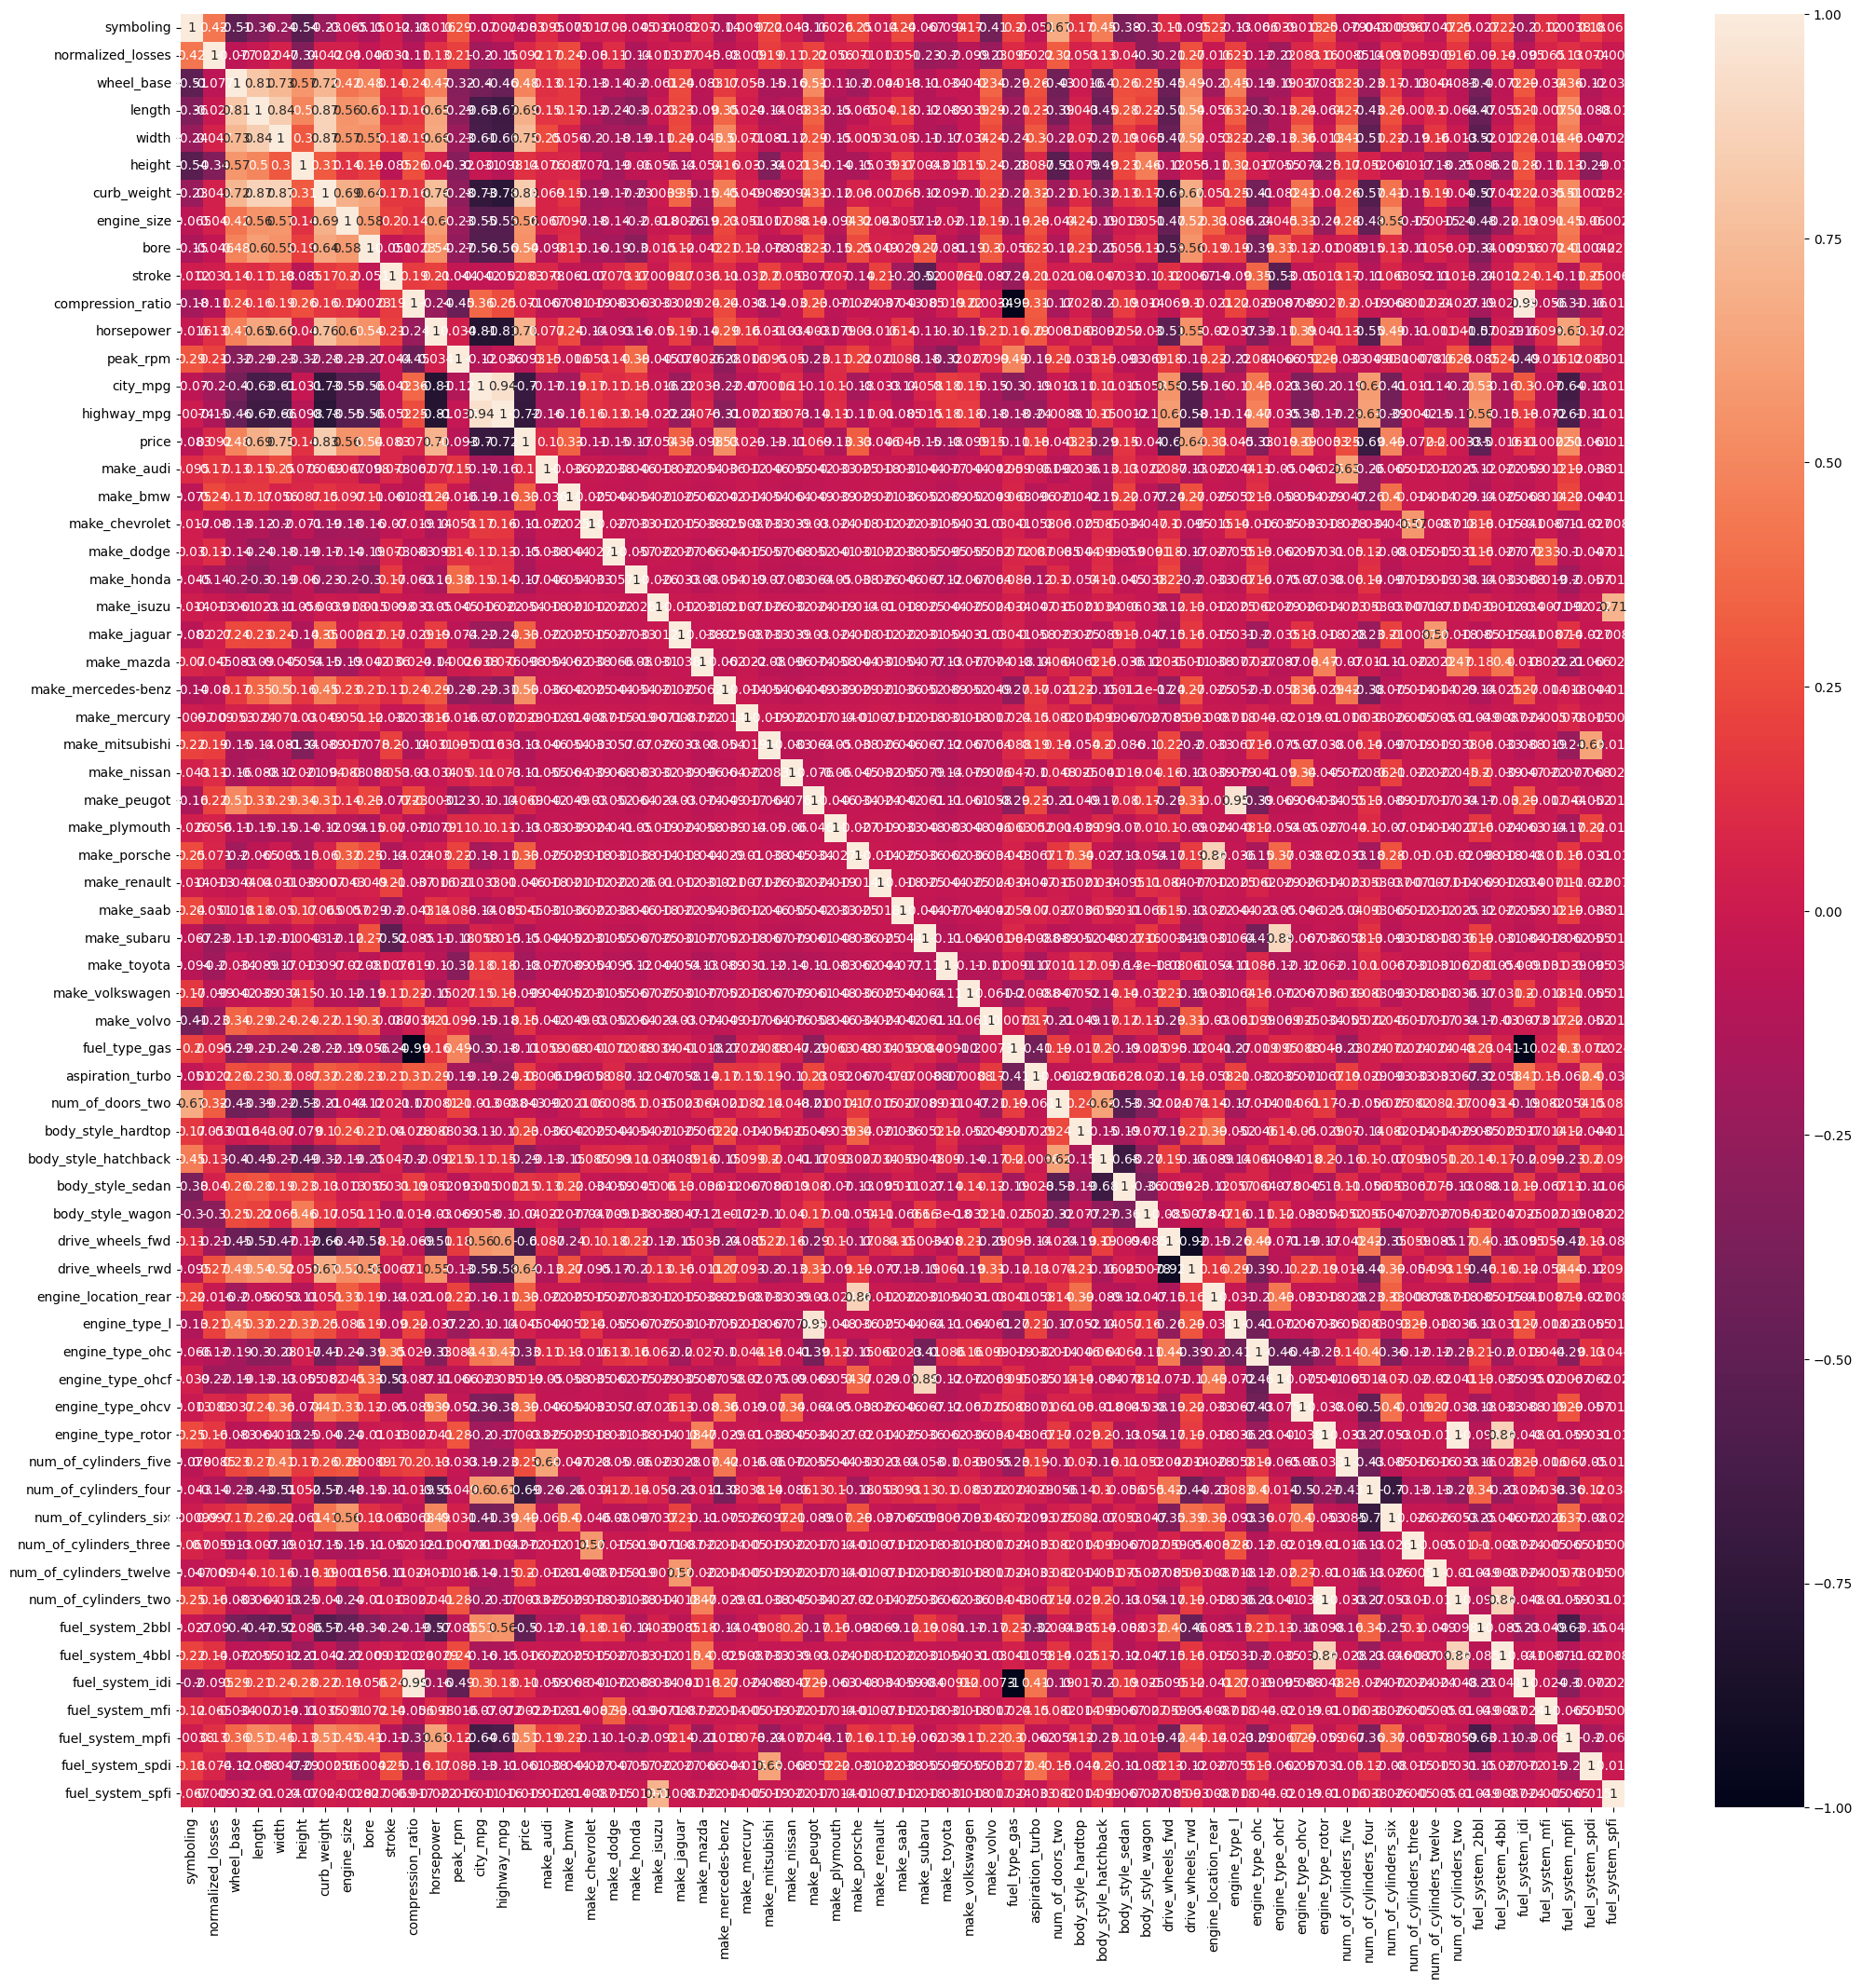

In [519]:
plt.figure(figsize=(25,25))
sns.heatmap(df3.corr(),annot=True)

In [517]:
# finding the correlation values between data
correaltion_values=abs(df3.corr()['price'].drop('price'))

In [635]:
# Sorting the values having more than 0.5 correlation with price
correaltion_values[correaltion_values>0.5].index

Index(['length', 'width', 'curb_weight', 'engine_size', 'bore', 'horsepower',
       'city_mpg', 'highway_mpg', 'make_mercedes-benz', 'drive_wheels_fwd',
       'drive_wheels_rwd', 'num_of_cylinders_four', 'fuel_system_mpfi'],
      dtype='object')

In [636]:
# Dropping all the columns with correlation less than 0.5
df4=df3[['length', 'width', 'curb_weight', 'engine_size', 'bore', 'horsepower',
       'city_mpg', 'highway_mpg', 'make_mercedes-benz', 'drive_wheels_fwd',
       'drive_wheels_rwd', 'num_of_cylinders_four', 'fuel_system_mpfi']]
df4.head()

,length,width,curb_weight,engine_size,bore,horsepower,city_mpg,highway_mpg,make_mercedes-benz,drive_wheels_fwd,drive_wheels_rwd,num_of_cylinders_four,fuel_system_mpfi
0,-0.462220,-0.857154,-0.014895,0.355803,0.524067,0.331438,-0.660749,-0.538164,0,0,1,1,1
1,-0.263718,-0.189737,0.516715,1.145680,-2.424744,1.655343,-0.994461,-0.697856,0,0,1,0,1
2,0.182911,0.143971,-0.422785,-0.398170,-0.521081,0.054342,-0.160182,-0.059086,0,1,0,1,1
3,0.182911,0.239316,0.518648,0.571224,-0.521081,0.454592,-1.161317,-1.336626,0,0,0,0,1
4,0.240808,0.191644,-0.094153,0.571224,-0.521081,0.300649,-0.994461,-0.857549,0,1,0,0,1


In [637]:
# writing a function to find the muliti collinearity between independent variables
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [638]:
correlation(df4,threshold=0.85) #setting threshold to 0.85

{'curb_weight', 'drive_wheels_rwd', 'highway_mpg'}

In [639]:
df4.drop(['curb_weight', 'drive_wheels_rwd', 'highway_mpg'],axis=1,inplace=True)

In [640]:
df4['price']=df.price

In [641]:
df4.head()

,length,width,engine_size,bore,horsepower,city_mpg,make_mercedes-benz,drive_wheels_fwd,num_of_cylinders_four,fuel_system_mpfi,price
0,-0.462220,-0.857154,0.355803,0.524067,0.331438,-0.660749,0,0,1,1,16500
1,-0.263718,-0.189737,1.145680,-2.424744,1.655343,-0.994461,0,0,0,1,16500
2,0.182911,0.143971,-0.398170,-0.521081,0.054342,-0.160182,0,1,1,1,13950
3,0.182911,0.239316,0.571224,-0.521081,0.454592,-1.161317,0,0,0,1,17450
4,0.240808,0.191644,0.571224,-0.521081,0.300649,-0.994461,0,1,0,1,15250


In [655]:
# finding the Best features for the price prediction
best_features=pd.DataFrame(correaltion_values).sort_values(by='price',ascending=False)[0:10]
best_features

,price
curb_weight,0.834420
width,0.752795
highway_mpg,0.719727
horsepower,0.706891
city_mpg,0.698607
num_of_cylinders_four,0.692552
length,0.690488
drive_wheels_rwd,0.639982
drive_wheels_fwd,0.597893
engine_size,0.562095


In [644]:
df4.to_csv('auto_data',index=False) 

# Importing Preprocessed data

In [645]:
data=pd.read_csv('auto_data')
data.head()

,length,width,engine_size,bore,horsepower,city_mpg,make_mercedes-benz,drive_wheels_fwd,num_of_cylinders_four,fuel_system_mpfi,price
0,-0.462220,-0.857154,0.355803,0.524067,0.331438,-0.660749,0,0,1,1,16500
1,-0.263718,-0.189737,1.145680,-2.424744,1.655343,-0.994461,0,0,0,1,16500
2,0.182911,0.143971,-0.398170,-0.521081,0.054342,-0.160182,0,1,1,1,13950
3,0.182911,0.239316,0.571224,-0.521081,0.454592,-1.161317,0,0,0,1,17450
4,0.240808,0.191644,0.571224,-0.521081,0.300649,-0.994461,0,1,0,1,15250


# Splitting the data into Train and test

In [646]:
x=data.drop('price',axis=1)
y=data.price

In [647]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10)

In [648]:
x_train.shape

(160, 10)

In [649]:
y_train.shape

(160,)

# Model Buliding

In [449]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
lr_model=LinearRegression()
lr_model.fit(x_train,y_train)

LinearRegression()

In [650]:
#making predctions for x test
pred=lr_model.predict(x_test)

In [651]:
# Training Score
lr_model.score(x_train,y_train)

0.8038682192682027

In [652]:
# Testing Score
lr_model.score(x_test,y_test)

0.7114561969351052

# Trying different machine learing models

In [453]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import ShuffleSplit

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

def find_best_model_using_randomizedsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'positive': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        },
        'random forest':{
            'model':RandomForestRegressor(),
            'params':{
              'n_estimators': [100, 200, 300],
                'max_depth': [None, 5, 10, 15],
                'min_samples_split': [2, 5, 10],
                'min_samples_leaf': [1, 2, 4],
                'max_features': ['auto', 'sqrt', 'log2'],
                'bootstrap': [True, False]  
            }
        },
        'svm':{
            'model':SVR(),
            'params' : {
                'kernel': ['linear', 'rbf', 'poly'],
                'C': [0.1, 1, 10],
                'gamma': ['scale', 'auto'],
                'degree': [2, 3, 4]
}
        },
        'xgboost':{
            'model':XGBRegressor(),
            'params':{
                
                'gamma': [0,0.1,0.2,0.4,12.8,25.6,51.2,102.4],
                'learning_rate': [0.01, 0.15, 0.2, 0.4, 0.7]
            }
        }
    }
    scores=[]
    cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
    for algo_name,config in algos.items():
        rs=RandomizedSearchCV(config['model'],config['params'],cv=cv,return_train_score=False)
        rs.fit(X,y)
        
        scores.append({
            'model':algo_name,
            'best_score':rs.best_score_,
            'best_params':rs.best_params_
        })
    return pd.DataFrame(scores,columns=['model','best_score','best_params']) 

find_best_model_using_randomizedsearchcv(x,y)


,model,best_score,best_params
0,linear_regression,0.647131,{'positive': False}
1,lasso,0.647591,"{'selection': 'random', 'alpha': 2}"
2,decision_tree,0.761941,"{'splitter': 'best', 'criterion': 'friedman_mse'}"
3,random forest,0.856551,"{'n_estimators': 300, 'min_samples_split': 2, ..."
4,svm,0.376180,"{'kernel': 'linear', 'gamma': 'scale', 'degree..."
5,xgboost,0.846654,"{'learning_rate': 0.2, 'gamma': 0}"


### Hyper tuning XGB Regressor parameters to improve its performance even more

In [454]:
# Importing Randomized search cv to hypertune parameters
from sklearn.model_selection import RandomizedSearchCV
param_grid = {'gamma': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4, 200],
              'learning_rate': [0.01, 0.03, 0.06, 0.1, 0.15, 0.2, 0.25, 0.300000012, 0.4, 0.5, 0.6, 0.7],
              'max_depth': [5,6,7,8,9,10,11,12,13,14],
              'n_estimators': [50,65,80,100,115,130,150],
              'reg_alpha': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,200],
              'reg_lambda': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,200]}
xg=XGBRegressor(random_state=10,verbosity=0)
rcv=RandomizedSearchCV(estimator=xg,param_distributions=param_grid,n_iter=100,cv=3,verbose=1,random_state=11,n_jobs=-1,return_train_score=True)

rcv.fit(x,y)


Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                        'learning_rate': [0.01, 0.03, 0.06, 0.1,
                                                          0.15, 0.2, 0.25,
                                                          0.300000012, 0.4, 0.5,
                                                          0.6, 0.7],
                                        'max_depth': [5, 6, 7, 8, 9, 10, 11, 12,
                                                      13, 14],
                                        'n_estimators': [50, 65, 80, 100, 115,
                                                         130, 150],
                                        'reg_alpha': [0, 0.1, 0.2, 0.4, 0.8,
                                                      1.6, 3.2, 6.4, 12.8, 25.6,
                                                      51.2, 102.4, 200],
                                        'reg_lambda': [0, 0.1, 0.2, 0.4, 0.8,
                                                       1.6, 3.2, 6.4, 12.8,
                                                       25.6, 51.2, 102.4,
                                                       200]},
                   random_state=11, return_train_score=True, verbose=1)

In [455]:
rcv.best_params_

{'reg_lambda': 25.6,
 'reg_alpha': 25.6,
 'n_estimators': 130,
 'max_depth': 9,
 'learning_rate': 0.5,
 'gamma': 25.6}

In [456]:
# XGB model
XGB2=XGBRegressor(reg_lambda= 25.6, reg_alpha= 25.6, n_estimators=130, max_depth=9,
                   learning_rate=0.5, gamma=25.6)
XGB2.fit(x_train,y_train)
y_pred=XGB2.predict(x_test)

In [457]:
# Training Accuaracy
y_train_pred=XGB2.predict(x_train)
r2_score(y_train,y_train_pred)

0.9918186552250983

In [458]:
# Testing Accuracy
r2_score(y_test,y_pred)

0.905317562209527

In [459]:
# Features for Random forest
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False] 


In [414]:
#dictionary for hyperparameters
random_grid = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf, 'bootstrap': bootstrap}

rf_clf1 = RandomForestRegressor(random_state=42)#model

rf_cv = RandomizedSearchCV(estimator=rf_clf1, scoring='accuracy',param_distributions=random_grid, n_iter=100, cv=3, 
                               verbose=2, random_state=42, n_jobs=-1)
rf_cv.fit(x, y)
rf_best_params = rf_cv.best_params_
print(f"Best paramters: {rf_best_params})")
 

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best paramters: {'n_estimators': 400, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 30, 'bootstrap': True})


In [418]:
# Random Forest Model
RF2=RandomForestRegressor(n_estimators= 400, min_samples_split= 5, min_samples_leaf=1, max_features='sqrt',
                   max_depth=30, bootstrap=True)
RF2.fit(x_train,y_train)
y_pred=RF2.predict(x_test)

In [419]:
# Training Accuaracy
y_train_pred=RF2.predict(x_train)
r2_score(y_train,y_train_pred)

0.9640280451663784

In [420]:
# Testing Accuracy
r2_score(y_test,y_pred)

0.914748326212997

In [597]:
# Storing differnt models performances
models_performance=pd.DataFrame(data={'Random forest':0.91474,'XGBoost':0.9053175,'Decision tree':0.761941,'Linear Regression':0.647131,
                                'Lasso':0.647591,'SVM':0.376180,},index=[0])
models_performance

,Random forest,XGBoost,Decision tree,Linear Regression,Lasso,SVM
0,0.91474,0.905317,0.761941,0.647131,0.647591,0.37618


### As we can see Random Forest Regressor is giving us Better Perfomance of 91 % when compared with Other Regression Models.So we are can consider its the BEST MODEL.

# Model Comparision Report
### We have tried with various Regression models like linear regression,lasso,Decsion Tree,Random Forest,SVM and XGBoost Regressor for the predition of price with the given Independent features and we got Random forest Regressor as our best model with a training accuracy of 96% and Testing Accuracy of 91%.

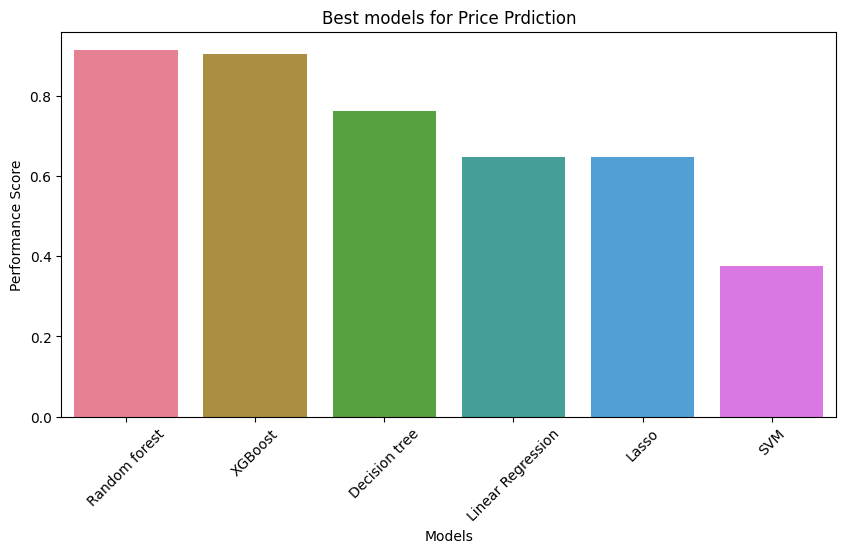

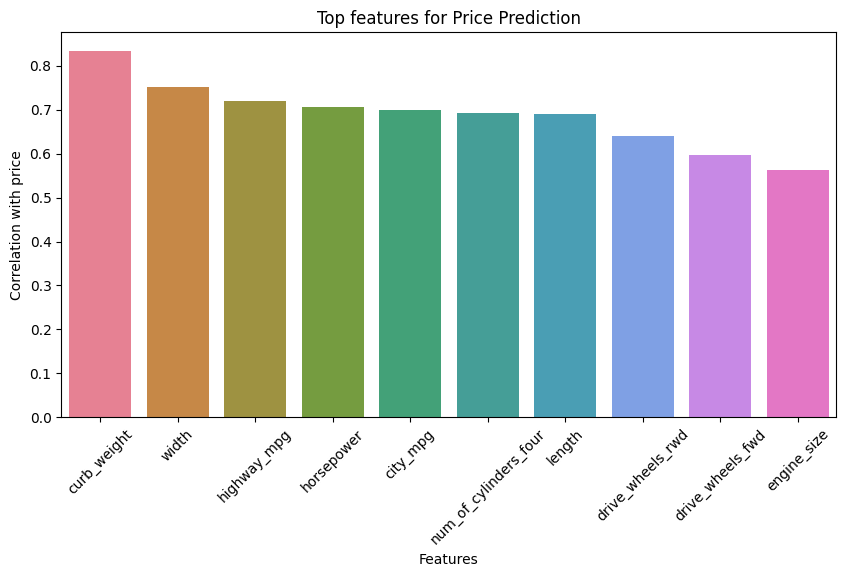

In [656]:
plt.figure(figsize=(10,5))
sns.barplot(data=models_performance,palette='husl')
plt.title('Best models for Price Prdiction')
plt.xlabel('Models')
plt.ylabel('Performance Score')
plt.xticks(rotation=45)  # Rotate x-labels by 45 degrees
plt.show()

plt.figure(figsize=(10,5))
sns.barplot(data=best_features.price,palette='husl')
plt.title('Top features for Price Prediction')
plt.xlabel('Features')
plt.ylabel('Correlation with price')
plt.xticks(rotation=45)  # Rotate x-labels by 45 degrees
plt.show()

# Report On Challenges Faced
* Creating Column names: After importing the data we found the columns are missing so we have created column names for all the features and the target.
* Converting Object type to Int Type: After performing Basic checks we can see that even when data inside the columns ['normalized_losses','bore','stroke','horsepower','peak_rpm'] is integer type the data frame is storing it has m type. so we need convert into integer format.
* Handling Null values: we had missing values in ['normalized_losses','bore','stroke','horsepower','peak_rpm',Num_of_doors] in these features so we imputed with median for numeric type and mode imputation done on categorical data.
* Handling Outliers : We can find Outliers in our data and we are have imputed those outliers with median as data is skewed.
* Scailing the data : we are using standard scaler to bring all the features into the same scale.
* Grouping the make feature unique values having less than 10 count into 'others' to reduce the more dummies creation or labelling values.
* Converting categorical data into Numerical data : we have tried with label encoding, manual encoding and one hot encoding techniques and found that label encoding the make feature and one hot encoding the other categories gave us the best performance for the model.
* Feature selection: we have dropped the features  having less 50% of correlation with the target and the features having the multicollinearity of more than 85%.
* Creating Train and test data for evaluating the model for train and test accuracies.
* Bulidng different regression models to find out the best model for this data.
* Hyper parameter Tuning : we have done hyper parameter tuning to improve the performance of the model.
* Evaluation Metrics : we have used R2 score as the evaluation metric for the model.